In [2]:
class TreeNode:
    def __init__(self , data):
        self.val = data
        self.left =  None
        self.right  = None

In [3]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None: return 'Nothing in the tree!'
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.val))
        
        for child in [tree.left, tree.right]:  # do for all children 
            if child is not None:
                if child == tree.left: dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right: dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child) ,label=str(child.val))
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)  # recursive call 

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    





def print_tree(tree, level=0, label='.'): 
    print(' ' * (level*2) + label + ':', tree.val)
    for child, lbl in zip([tree.left, tree.right], ['L', 'R']):  # do for all children 
        if child is not None:
            print_tree(child, level+1, lbl)
            
    

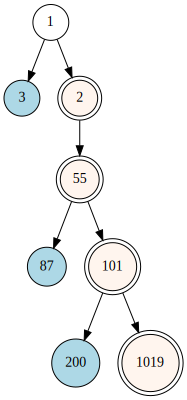

.: 1
  L: 3
  R: 2
    R: 55
      L: 87
      R: 101
        L: 200
        R: 1019


In [4]:
t1 = TreeNode(1)
t1.left  = TreeNode(3)

t1.right  = TreeNode(2)
t1.right.right = TreeNode(55)
t1.right.right.left  = TreeNode(87)
t1.right.right.right  = TreeNode(101)

t1.right.right.right.right  = TreeNode(1019)
t1.right.right.right.left  = TreeNode(200)

visualize_tree(t1)
print_tree(t1)

# Insertion in BST


In [5]:
class BST(TreeNode):
    def __init__(self,val , parent = None):
        super().__init__(val)
        self.parent = parent
    def insert(self,val):
        if val < self.val:
            if self.left is None:
                new_node = BST(val,parent = self)
                self.left = new_node
            else:
                self.left.insert(val)
        else:
            if self.right is None:
                self.right = BST(val,parent = self)
            else:
                self.right.insert(val)

In [6]:
def dfs_inorder(self):
    if self.left:
        self.left.dfs_inorder()
    print(self.val)
    
    if self.right:
        self.right.dfs_inorder()
TreeNode.dfs_inorder = dfs_inorder
    

In [7]:
b = BST(3)
b.dfs_inorder()

3


# Deletion in BST

In [8]:
def find_root(self):
    """find the absolute of the BST to Which self belong """
    temp = self
    while temp.parent is not None:
        temp = temp.parent #parent ka parent jab tak akiri ka parent 
    return temp
BST.find_root = find_root

In [9]:
def find_min(self):
    """Find the minimum value starting from self.
    In BST it is simple, keep going left until no more left is left"""
    
    min_node = self
    # min_node will be 20 , 10 and then 1
    if self.left is not None:
        min_node = find_min(self.left)#  min_node = self.left.find_min()
    return min_node
BST.find_min = find_min
    

In [10]:
print("min : ", b.find_min().val)
print(b.find_root().val)

min :  3
3


In [43]:
def set_for_parent(self,new_ref):
    """Disconnect self from parent and attach new_ref to parent in self's place.
    Agar mein apnay parent a left child hun tu disconnect from parent and set it to new_node"""
    
    if self.parent is None:
        return None
    if self.parent.right == self: #agar mein apny parent ka right child hun to
        self.parent.right = new_ref
    if self.parent.left  == self:
        self.parent.left = new_ref

BST.set_for_parent = set_for_parent

In [44]:
def replace_with_node(self,node):
    """replace self with  node (which is a child ).
    Make sure that to fix the parent of the node ,Assume we have no children to that  node"""
    self.set_for_parent(node) #connect new_node to parent on proper location
    node.parent = self.parent # set's node parent correctly
    self.parent  = None       #disconnect self from the parent
    return node.find_root()   # find root again
BST.repalce_with_node = replace_with_node

In [45]:
def delete(self,val):
    """If one node and alone value  matches then simple return None"""
    if self.parent is None and self.right is None and self.left is None  and self.val == val:
        return None
    #we are the node
    #CASE 1 
    if self.val == val:
        #check if we are leaf or not
        #Here it mean its a leaf
        #CASE :  1
        if self.right is None and self.left is None:
            self.set_for_parent(None)
            return self.find_root()
        # check if we have only one left node 
        #one child case 
        if self.right is None:
            return self.replace_with_node(self.left)
        
        if self.left is None:
            return self.replace_with_node(self.right)
        """now if we have both childrens . Find successors and replace self with it 
        Our succssor if definitly on the right child and it cant have two childrens
        because left child will be smaller"""
        
        successor  = self.right.find_min()
        
        #Copy successor's val here
        self.val = successor.val
        #Delete successor node which is our right child in BST
        #IT is simpler case that successor doesnt hace left child
        return self.right.delete(successor.val)
    if val < self.val:
        if self.left is not None:
            return self.left.delete(val)
        else:
            return self.find_root() # nothing to delete # no left return its root 
    else:
        if self.right is not None:
            return self.right.delete(val)
        else:
            return self.find_root()
        
BST.delete = delete        

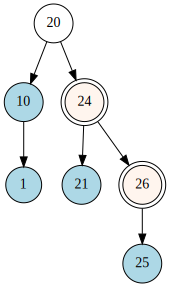

In [46]:
b  = BST(20)
b.insert(10)
b.insert(1)
b.insert(24)
b.insert(21)

b.insert(26)
b.insert(25)
visualize_tree(b)

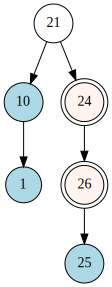

In [47]:
b.delete(20)
visualize_tree(b)

In [48]:
b.delete(10)
visualize_tree(b)

AttributeError: 'BST' object has no attribute 'replace_with_node'

# Searching 

In [37]:
def search(self,x):
    if self is None:
        return None
    if self.val == x:
        return self.val
    
    res1 = search(self.left, x)  
  
    """ now recur on right subtree """
    res2 = search(self.right, x)
    if res1 or res2  is None:
        if self.val != x:
        #return x
            raise(Exception(str(x) + " is not present"))
    else:
         return res1 or res2 
   
    

BST.search = search

In [41]:
b.search(21)

21

In [34]:
def bst_verify(self):
    if self.left:
        if self.left.val < self.val:
            return True
        else:
            return False
        
    if self.right:
        if self.right.val > self.val:
            return True
        else:
            return False
BST.bst_verify = bst_verify
b.bst_verify() 

True

In [35]:
def bst_prop(self):
    if self is None:
        return None
    if self.left:
        if self.left.val < self.val:
            return True
        else:
            return False
    if self.right:
        if self.right.val > self.val:
            return True
        else:
            return False
BST.bst_prop = bst_prop

In [36]:
b.bst_prop()

True